In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [8]:
mnistDB=keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnistDB.load_data()

In [9]:
x_train=x_train.reshape((60000,28*28))
x_test=x_test.reshape((10000,28*28))


In [10]:
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

In [13]:
ML=keras.models.Sequential()

In [15]:
ML.add(keras.layers.Dense(units=50,activation='relu',input_shape=x_train.shape[1:]))
ML.add(keras.layers.Dense(units=100,activation='relu'))
ML.add(keras.layers.Dense(units=70,activation='relu'))

In [16]:
ML.add(keras.layers.Dense(units=10,activation='softmax'))
ML.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                39250     
                                                                 
 dense_1 (Dense)             (None, 100)               5100      
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 100)               5100      
                                                                 
 dense_4 (Dense)             (None, 70)                7070      
                                                                 
 dense_5 (Dense)             (None, 10)                710       
                                                                 
Total params: 62,280
Trainable params: 62,280
Non-traina

In [17]:
ML.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [18]:
ML.fit(x_train,y_train,epochs=1,batch_size=16)
test_loss,test_acc=ML.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1401 - accuracy: 0.9591


In [20]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

In [28]:
img=load_img('/content/1.jpg',grayscale=True,target_size=(28,28))


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


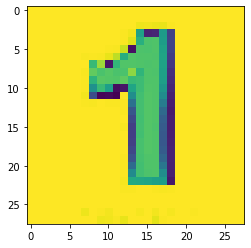

In [29]:
plt.imshow(img)
img=img_to_array(img)

In [23]:
img=img.reshape(1,28*28)

In [27]:
img=img.astype('float32')/255.0
digit=ML.predict(img)
print('digit is',digit[0])

digit is [0.04915041 0.10025375 0.06872559 0.07894335 0.10164971 0.24689165
 0.07132211 0.07750957 0.10479683 0.10075694]
